<a href="https://colab.research.google.com/github/fourfeatherz/DS2002S25/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [34]:
import sqlite3

#connect to the database
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

#create heroes table
cursor.execute("""
CREATE TABLE IF NOT EXISTS heroes (
    hero_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL UNIQUE,
    power TEXT NOT NULL,
    team TEXT
);
""")

#create villains table
cursor.execute("""
CREATE TABLE IF NOT EXISTS villains (
    villain_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL UNIQUE,
    evil_plan TEXT NOT NULL
);
""")

#create battles table
cursor.execute("""
CREATE TABLE IF NOT EXISTS battles (
    battle_id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER NOT NULL,
    villain_id INTEGER NOT NULL,
    outcome TEXT CHECK(outcome IN ('Hero Wins', 'Villain Wins', 'Draw')) NOT NULL,
    battle_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (hero_id) REFERENCES heroes(hero_id),
    FOREIGN KEY (villain_id) REFERENCES villains(villain_id)
);
""")

#commit and close the connection
conn.commit()
conn.close()

print("Database created successfully!")



Database created successfully!


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [37]:
import pandas as pd
import sqlite3

#reconnect to the database
conn = sqlite3.connect("superhero_db.sqlite")

#load and insert heroes data
df_heroes = pd.read_csv("/heroes.csv")

#rename 'id' column to match the database schema
df_heroes = df_heroes.rename(columns={'id': 'hero_id', 'power': 'powers'}) #i couldn't get it to work without doing this

#insert into the heroes table
df_heroes.to_sql("heroes", conn, if_exists="replace", index=False)
print("hero data inserted successfully!")

#load and insert villains data
df_villains = pd.read_csv("/villains.csv")

#rename 'id' column to match the database schema
df_villains = df_villains.rename(columns={'id': 'villain_id'})

#insert into the villains table
df_villains.to_sql("villains", conn, if_exists="replace", index=False)
print("villain data inserted successfully!")

#load and insert battles data
df_battles = pd.read_csv("/battles.csv")

#rename 'id' column to match the database schema
df_battles = df_battles.rename(columns={'id': 'battle_id'})

#insert into the battles table
df_battles.to_sql("battles", conn, if_exists="replace", index=False)

print("battle data inserted successfully!")

#close connection
conn.close()
print("all .csv data has been successfully imported into the database!")


hero data inserted successfully!
villain data inserted successfully!
battle data inserted successfully!
all .csv data has been successfully imported into the database!


In [60]:
import sqlite3

conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

#check and display data from a table
def check_table_data(table_name):
    cursor.execute(f"SELECT * FROM {table_name};")
    rows = cursor.fetchall()

    print(f"\n {table_name} table data:")
    if rows:
        for row in rows:
            print(row)
    else:
        print("No data found!")

#check data in all tables
check_table_data("heroes")
check_table_data("villains")
check_table_data("battles")
conn.close()



 heroes table data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7, 'Black Panther', 'Enhanced Agility', 'Avengers')
(8, 'The Flash', 'Super Speed', 'Justice League')
(9, 'Hulk', 'Super Strength', 'Avengers')
(10, 'Doctor Strange', 'Mystic Arts', 'Avengers')

 villains table data:
(1, 'Green Goblin', 'Terrorize New York')
(2, 'Thanos', 'Collect all Infinity Stones')
(3, 'Joker', 'Spread chaos in Gotham')
(4, 'Lex Luthor', 'Defeat Superman')
(5, 'Loki', 'Trick humanity into worshiping him')
(6, 'Ultron', 'AI world domination')
(7, 'Darkseid', 'Control the universe')
(8, 'Venom', 'Consume Spider-Man')
(9, 'Magneto', 'Mutant supremacy')
(10, 'Red Skull', 'Revive Hydra')

 battles table data:
(1, 1, 10, 'Villain Wins')
(2, 9, 3, 'Hero Wins'

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [50]:
import sqlite3

#retrieve all superheroes and their powers
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()
cursor.execute("SELECT name, powers FROM heroes;")
heroes = cursor.fetchall()
print("\n all superheroes and their powers:")
for hero in heroes:
    print(hero)
conn.close()



 all superheroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [49]:
#find all battles where the hero won
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()
cursor.execute("""
    SELECT battles.battle_id, heroes.name AS hero_name, villains.name AS villain_name, battles.outcome
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.hero_id
    JOIN villains ON battles.villain_id = villains.villain_id
    WHERE battles.outcome = 'Hero Wins';
""")
hero_wins = cursor.fetchall()

print("\n battles where the hero won:")
for battle in hero_wins:
    print(battle)
conn.close()



 battles where the hero won:
(2, 'Hulk', 'Joker', 'Hero Wins')
(5, 'Spider-Man', 'Darkseid', 'Hero Wins')
(7, 'Hulk', 'Venom', 'Hero Wins')
(8, 'Batman', 'Thanos', 'Hero Wins')
(9, 'Black Panther', 'Loki', 'Hero Wins')
(13, 'The Flash', 'Magneto', 'Hero Wins')
(20, 'Batman', 'Lex Luthor', 'Hero Wins')
(29, 'Batman', 'Loki', 'Hero Wins')
(30, 'Thor', 'Loki', 'Hero Wins')


In [48]:
#list all villains and their evil plans
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()
cursor.execute("SELECT name, evil_plan FROM villains;")
villains = cursor.fetchall()

print("\n all villains and their evil plans:")
for villain in villains:
    print(villain)
conn.close()


 all villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')


In [47]:
#determine which superhero has fought the most battles
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()
cursor.execute("""
    SELECT heroes.name, COUNT(battles.battle_id) AS total_battles
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.hero_id
    GROUP BY heroes.name
    ORDER BY total_battles DESC
    LIMIT 1;
""")
most_battles = cursor.fetchone()

print("\n superhero with the most battles:")
print(most_battles)
conn.close()



 superhero with the most battles:
('Batman', 7)


## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [53]:
import sqlite3

conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

#love_interests table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS love_interests (
        love_id INTEGER PRIMARY KEY AUTOINCREMENT,
        hero_id INTEGER NOT NULL,
        love_interest_name TEXT NOT NULL,
        relationship_description TEXT,
        FOREIGN KEY (hero_id) REFERENCES heroes(hero_id)
    );
""")

#commit and close
conn.commit()
conn.close()

print("love interests table created successfully!")


love interests table created successfully!


In [54]:
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

#sample love interests data
love_interests_data = [
    (1, "Lois Lane", "Long-time love interest of Superman."),
    (2, "Selina Kyle (Catwoman)", "Complicated relationship with Batman."),
    (3, "Mary Jane Watson", "Spider-Man's most well-known love interest."),
    (3, "Gwen Stacy", "Tragic love story with Spider-Man."),
    (4, "Peggy Carter", "Steve Rogers' first love before being frozen."),
    (4, "Sharon Carter", "Peggy's niece, later love interest of Captain America."),
    (5, "Jane Foster", "Thor’s human love interest."),
]

#insert data
cursor.executemany("""
    INSERT INTO love_interests (hero_id, love_interest_name, relationship_description)
    VALUES (?, ?, ?);
""", love_interests_data)

#commit and close
conn.commit()
conn.close()

print("love interests data inserted successfully!")


love interests data inserted successfully!


In [61]:
#query retrieving all superheroes and their love interests
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()
cursor.execute("""
    SELECT heroes.name, love_interests.love_interest_name, love_interests.relationship_description
    FROM love_interests
    JOIN heroes ON love_interests.hero_id = heroes.hero_id;
""")

love_list = cursor.fetchall()

print("\n superhero love interests:")
for item in love_list:
    print(item)
conn.close()



 superhero love interests:
('Spider-Man', 'Lois Lane', 'Long-time love interest of Superman.')
('Iron Man', 'Selina Kyle (Catwoman)', 'Complicated relationship with Batman.')
('Batman', 'Mary Jane Watson', "Spider-Man's most well-known love interest.")
('Batman', 'Gwen Stacy', 'Tragic love story with Spider-Man.')
('Superman', 'Peggy Carter', "Steve Rogers' first love before being frozen.")
('Superman', 'Sharon Carter', "Peggy's niece, later love interest of Captain America.")
('Thor', 'Jane Foster', 'Thor’s human love interest.')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

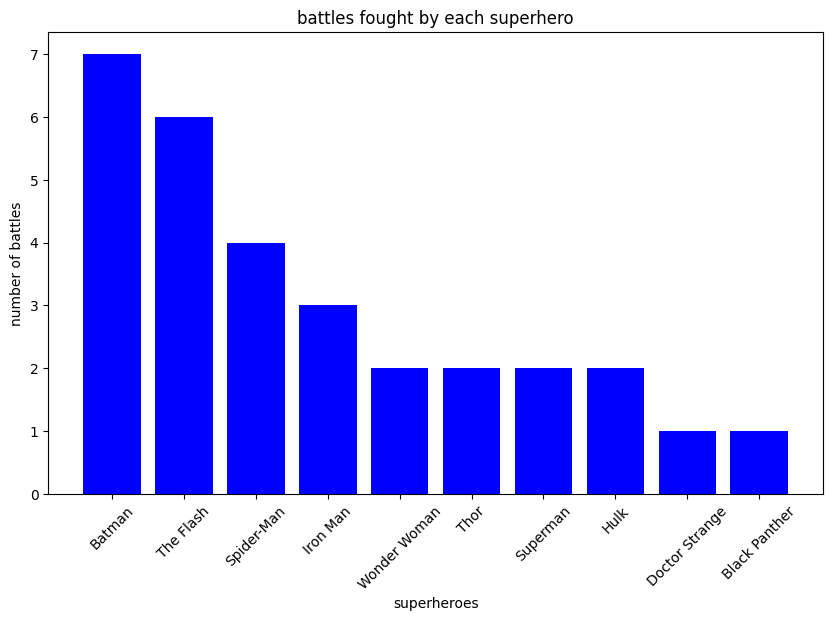

In [59]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#counting battles per superhero
conn = sqlite3.connect("superhero_db.sqlite")
query = """
    SELECT heroes.name, COUNT(battles.battle_id) AS total_battles
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.hero_id
    GROUP BY heroes.name
    ORDER BY total_battles DESC;
"""

df_battles = pd.read_sql_query(query, conn)
conn.close()

#plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df_battles["name"], df_battles["total_battles"], color="blue")
plt.xlabel("superheroes")
plt.ylabel("number of battles")
plt.title("battles fought by each superhero")
plt.xticks(rotation=45)

#show the plot
plt.show()


## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!